# Assignment 3 - Cycling from NYC to Key West

According to my odometer the distance between New York City and Key West is about 1600 miles using cycling friendly roads. The trip was completed in 20 days.

The goal is to show the distance that was traveled each day.


### Create a Pandas Series Object
The series will hold the collected data. The data was recorded by reading the odometer at the end of each day.

In [97]:
import pandas as pd

# The data
OdometerData= {1:55,2:120,3:200,4:270,5:320,6:410,7:497,8:550,9:643,10:714,
               11:800,12:912,13:1020,14:1100,15:1160,16:1213,17:1301,18:1420,19:1525,20:1600}

# Creating a series called 'ser' using the above data
ser = pd.Series(data=OdometerData)

# Pinting the series
print(ser)

1       55
2      120
3      200
4      270
5      320
6      410
7      497
8      550
9      643
10     714
11     800
12     912
13    1020
14    1100
15    1160
16    1213
17    1301
18    1420
19    1525
20    1600
dtype: int64


### Create a DataFrame

Using the series above, I've created a DataFrame with the "Day" and "Total Miles" columns

In [98]:
#Create a DataFrame called 'df'
#The 'Day' column holds the index of the 'ser' series and the 'Total Miles' holds the series values
df=pd.DataFrame({'Day':ser.index,'Total Miles':ser.values})

#Print the DataFrame
df

,Day,Total Miles
0,1,55
1,2,120
2,3,200
3,4,270
4,5,320
5,6,410
6,7,497
7,8,550
8,9,643
9,10,714


### Calculate miles traveled each day

Next, looping through the index of the DataFrame, I created a new column called "Miles Each Day" and calculated the miles traveled each day. 

The values of the "Miles Each Day" column were calculated like this:

###### (Miles of Day i) = (Total Miles Recorded day i) - (Total Miles Recorded day [i-1])

(i.e., Miles traveled day 2 = ("Total Miles" recorded in day 2 - "Total Miles" recorded in day 1))

The calculation is not applied to Day 1 as that information is already available.

In [99]:
# Useing a for loop to loop through the DataFrame index
# additionally, a if else function is used to skip the calculation for day 1
for i in df.index:
    if i > 0:
        df.at[i,"Miles Each Day"] = (df.at[i,"Total Miles"]-df.at[i-1,"Total Miles"])
    else:
        df.at[i,"Miles Each Day"] = df.at[i,"Total Miles"]

        
#Print updated df DataFrame        
df

,Day,Total Miles,Miles Each Day
0,1,55,55.0
1,2,120,65.0
2,3,200,80.0
3,4,270,70.0
4,5,320,50.0
5,6,410,90.0
6,7,497,87.0
7,8,550,53.0
8,9,643,93.0
9,10,714,71.0


The DataFrame now includes the miles travelled each day.

However, to better represent the data I have plotted it on a bar chart.

#### Plotting the miles travelled each day

<AxesSubplot:title={'center':'Miles per Day - Cycling from NYC to Key West'}, xlabel='Day', ylabel='Miles'>

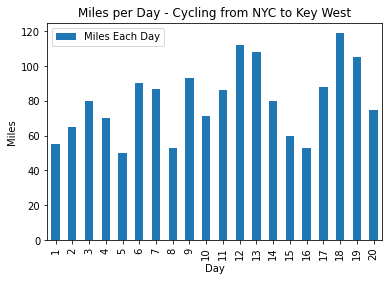

In [100]:
#Plotting the data on a Bar Chart
#The x axis will represent the Day, while the y axis will show the miles traveled that day.

df.plot(x="Day",y="Miles Each Day",
        title=("Miles per Day - Cycling from NYC to Key West"),
        ylabel=("Miles"),
        kind="bar")